## Theano - Deep Learning Library

Theano is a python library that makes writing deep
learning models easy, and gives the option of training them on a GPU.

#### Installing Theano
http://deeplearning.net/software/theano/install.html

- #### Requirements
    - Developed mainly on 64-bit Linux machine
    - Python 3.3 and above supported
    - g++ >= 4.2 
    - NumPy >= 1.7.1
    - SciPy >= 0.11
    - BLAS 

Some Optionals 
    - nose >= 1.3.0 - to run Theano’s test-suite
    - pydot - To be able to make picture of Theano computation graph.
    - NVDIA CUDA drivers and SDK - for GPU code generation
    - libgpuarrsay

#### Installation for Mac OS using Anaconda
(may need to activate python 3.4 version)

On the commandline enter:
    - pip install Theano
    - Theano officially supports only clang on OS X. 
    - This can be installed by getting XCode from the App Store and running it once to install the command-line tools.

#### For other operating systems check the [link](http://deeplearning.net/software/theano/install.html)

Goal:
- Theano Basics 
- Dissect into available code for logistic regression with Theano
    - [See the link](http://deeplearning.net/tutorial/code/logistic_sgd.py) 

In [94]:
import numpy as np
from theano import function, shared, config, pp, Param
import theano.tensor as T
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pickle
import gzip
import os
import sys
import timeit

### Symbolic theano variables
- In theano, you express everything symbolically and compile the expression afterwards to get functions

### Creating scalar symbolic variables:
T.dscalar 
- double scalar (0-d) symbolic variable (scalar)
- d:double
- Constructors for other data types can be found 
    - [see link](http://deeplearning.net/software/theano/library/tensor/basic.html)
- e.g., iscalar, lscalar, fscalar,

In [ ]:
#theano symbolic variable initialization
x = T.dscalar('x')  
y = T.dscalar('y')

a = T.scalar('x', dtype='float64')
c, d = T.fscalars(2)
e, f = T.iscalars('e', 'f')

print(x.type, a.type, c.type, e.type)

### Creating vector and matrix symbolic variables

In [ ]:
#theano symbolic vector and matrix initialization
x = T.dvector('x')
y = T.dmatrix('y')

a,b = T.imatrices(2)
print(x.type, y.type, a.type)
print(x.ndim)
print(a.ndim)

### theano.function()
- interface for compiling graphs into callable objects
- function([inputs], outputs)

In [ ]:
#theano symbolic variable initialization
x = T.dscalar('x')
y = T.dscalar('y')

# model
z = x**2 + y**2 + 2*x*y

# compiles to a python function
f = function(inputs=[x, y], outputs=z) 

# applying
out = f(3.0,4.0)
print(out) 
print(3**2 + 4**2 + 2*3*4)
out2 = z.eval({x:3.0, y:4.0})
print(out2)

### returning multiple outputs

In [ ]:
x, y = T.dmatrices('x', 'y')
diff = x - y
abs_diff = abs(diff)
diff_squared = diff**2
f = function([x, y], [diff, abs_diff, diff_squared])

a = [[1,2], [3,4]]
b = [[4,6], [8,10]]

out1, out2, out3 = f(a,b)
print(out1, '\n')
print(out2, '\n')
print(out3, '\n')

In [ ]:
x = T.dvector()
y = T.dvector()
z = T.dot(x,y)

f = function([x,y], z)

out = f([1,2], [2,3])
print(out, 1*2 + 2*3)

#### Activation function
- Logistic function
- # $\frac{1}{1 + e^{-x}}$

In [95]:
x = T.dscalar('x')

def model(x):
    return 1/(1 + T.exp(-x))

sig = model(x)

f = function([x],sig)
out = f(0)
print(out)

0.5


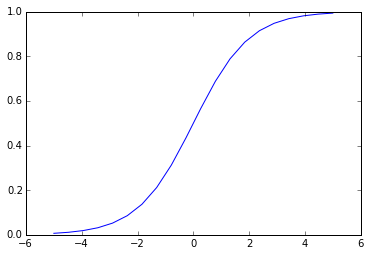

In [96]:
x = T.dvector('x') 
sig = 1/(1 + T.exp(-x))

f = function([x],sig)

x1 = np.linspace(-5, 5, 20)
y = f(x1)
plt.plot(x1, y)
plt.show()

#### Activation function
- tanh function

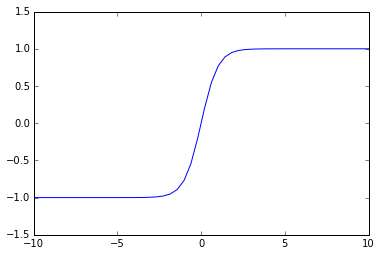

In [97]:
x = T.dvector('x')
tanh = T.tanh(x)

f = function([x], tanh)

# Plot 
x1 = np.linspace(-10,10, 50)
plt.plot(x1, f(x1))
plt.axis([-10, 10, -1.5, 1.5])
plt.show()

### Setting a default

In [98]:
x, y = T.dscalars('x', 'y')
tanh = T.tanh(x*y)
f = function([x, Param(y, default=1)], tanh)
print(f(10))
print(f(10, 2))

0.9999999958776927
1.0


####  Neural Network 
In Multilayer Perceptron Learning (MPL) algorithms
- ## $z = w*x + b$
- w: Weight matrix
- x: input vector
- b: bias vector

<img src="Perceptron_bkp_1.png">
source: http://www.saedsayad.com/artificial_neural_network_bkp.htm

In [107]:
np.random.seed(1234)
w = T.dmatrix('w') 
x = T.dvector('x')
b = T.vector('b')

y = T.dot(w,x) + b
z = T.vector('z')

fn = function([w, x, b], y)
sig = 1/(1 + T.exp(-z)) 
f = function([z], sig)

w1 = np.array([[-1, 0, 1], [0, 1, 0], [1, 1, 1]])
x1 = np.array([2, 3,4])
b1 = np.random.randn(3)

print(w1)
y1 = fn(w1,x1,b1)
print('y', y1)
out = f(y1)
print('out', out)

[[-1  0  1]
 [ 0  1  0]
 [ 1  1  1]]
y [  2.47143516   1.80902431  10.43270697]
out [ 0.9221149   0.85924391  0.99997055]


In [109]:
np.random.seed(1234)
w = T.dmatrix('w') 
x = T.dvector('x')
b = T.vector('b')

y = T.dot(w,x) + b

sig2 = 1/(1 + T.exp(-y))
f = function([w,x,b], sig2)

w1 = np.array([[-1, 0, 1], [0, 1, 0], [1, 1, 1]])
x1 = np.array([2, 3,4])
b1 = np.random.randn(3)

f(w1,x1, b1)


array([ 0.9221149 ,  0.85924391,  0.99997055])

### Shared variables
- hybrid symbolic/non-symbolic variables whose values may be shared between multiple functions 
    - function with an internal state
    - updates
    - get_values()
    - set_values()

In [110]:
# shared variable - model parameter initialization
state = shared(0)  
inc = T.iscalar('inc')
updates = [(state, state + inc)]

f = function([inc], state, updates=updates) #outputs state & updates it
                                            #increment, decrement
for i in range(5):
    print(i, f(2), state.get_value())

print(state.get_value())
state.set_value(0)
print(state.get_value())

0 0 2
1 2 4
2 4 6
3 6 8
4 8 10
10
0


### Theano random numbers 
- using pseudo random numbers is not straight forrward as in NumPy

In [111]:
# work only on CPU 
from theano.tensor.shared_randomstreams import RandomStreams
rst = RandomStreams(seed=1234) # allocates NumPy random stream object - are shared variables
urnd = rst.uniform((3,3))  # 3 x 3 uniform random numbers
nrnd = rst.normal((3, 3), avg = 0.5, std = 1.5)

f = function([], urnd)
g = function([], nrnd, no_default_updates=True) #Does not update nrnd

ff = function([], urnd + urnd - 2*urnd)
print(f())
print('')
print(g())
print('')
print(ff())

[[ 0.75718064  0.1130526   0.00607781]
 [ 0.8721389   0.31027075  0.24150866]
 [ 0.56740797  0.73226671  0.97511917]]

[[ 1.14113913  3.11074737  0.46746439]
 [ 2.72601629 -0.32071106  1.460445  ]
 [ 1.00163875 -2.39430266  0.47174842]]

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


### Gradient Descent Using Theano

In [114]:
x, y, z = T.dscalars('x', 'y', 'z')
fnc = ((z-3*x)**4)*T.exp(x-y) + ((3*x + y + 2*z + 7)**2)*T.exp(y-z)
dx, dy, dz = T.grad(cost=fnc,wrt=[x,y,z])


f = function([x,y,z], fnc)
g = function([x, y, z], [dx, dy, dz])


x = -1
y = 0
z = 1
learning_rate = 0.001
fnc0 = f(x,y,z)
tol = 0.001
while(1):
    gx, gy, gz = g(x,y,z)
    x = x - learning_rate*gx
    y = y - learning_rate*gy
    z = z - learning_rate*gz
    if fnc0 - f(x,y,z) < tol:
        break
    fnc0 = f(x,y,z)
print(f(x,y,z),'\n', x,y,z, '\n', gx, gy, gz) 

0.7762870182329094 
 0.255447028107 -3.09877804969 0.897036569027 
 -0.045486650458838374 0.9985165413361967 -0.0370690021341048


In [115]:
w = T.dmatrix('w')
p = T.sum(1 / (1 + T.exp(-w)))
gw = T.grad(p, w)
f = function([w], gw)

a = np.array([[1,2,3], [1,0,2], [2, 1, 0]])
b = np.array([[2],[1], [0]])
print(f(a))

[[ 0.19661193  0.10499359  0.04517666]
 [ 0.19661193  0.25        0.10499359]
 [ 0.10499359  0.19661193  0.25      ]]


### Linear regression using theano

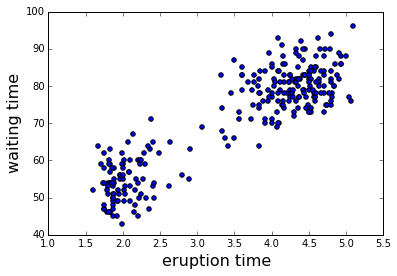

,x,y
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [44]:
import pandas as pd
old_faithful = pd.read_fwf('../old_faithful_data.txt', usecols=["eruptions", "waiting"])
old_faithful.describe()
plt.scatter(old_faithful.eruptions, old_faithful.waiting)
plt.xlabel('eruption time', fontsize=16)
plt.ylabel('waiting time', fontsize=16)
plt.show()
old_faithful.head()
df = old_faithful
df.columns = ['x', 'y']
df.head()

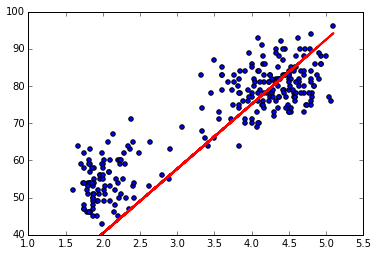

In [117]:
from IPython import display
import time

dataX = np.array(df['x'])
dataY = np.array(df['y'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis([1,5.5,40, 100])
plt.ion()
plt.scatter(trX, trY)


X = T.vector()
Y = T.vector()

def model(X, w, b):
    return X*w + b

w = shared(np.asarray(np.random.randn(), dtype=config.floatX))
b = shared(np.asarray(np.random.randn(), dtype=config.floatX))
y = model(X,w, b)

learning_rate = 0.01
cost = T.mean(T.sqr(y - Y))
gw, gb = T.grad(cost=cost, wrt=w), T.grad(cost=cost, wrt=b)
updates = [(w, w - learning_rate * gw), (b, b - learning_rate * gb)]

train = function(inputs=[X,Y], outputs=[cost], updates=updates) 
predict = function([X],y)

for i in range(10):
    out = train(dataX, dataY)
    if ax.lines: 
        del ax.lines[0]
    
    plt.plot(dataX, predict(dataX), "-", linewidth=2, color='red')
    #plt.draw()
    
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plt.pause(0.5/(float(i)*5 +1)) 

### Logistic  regression classifier
- Logistic neurons compute their output values from their input.
    - $z = Wx + b$
        - W: weight matrix (Weights of the connection)
        - x: input vector 
        - b: bias vector
 
- The neuron computes the weighted sum of its inputs, the logit, z. 
- Feeds the logit into the input function to compute y, its final output
    - $y = \frac{1}{1 + e^{-z}}$
        - y: output vector
- Logistic regression neuron calculates the probability that an input belongs to one of the target classes.
    - x: input vector - 1D image of a digit (28 x 28 flattened to 1 x 784)
    - target class - i = 0, 1, 2, ..., 9
    - $P(y = i | x) = softmax_i(z) = \frac{z_i}{\sum_j e^z_j}$
        - $z_j = W_jx + b_j$
    - 10 possible outcomes
    - select the one with the highest probability (T.argmax())
    
- [Adopted from](http://deeplearning.net/tutorial/code/logistic_sgd.py)

In [76]:
class LogisticRegression(object):

    def __init__(self, input, inputDim, outputDim):
    
        self.W = shared(np.zeros((inputDim, outputDim), dtype= config.floatX),
                        name='W',
                        borrow=True
                       )
        
        self.b = shared(np.zeros((outputDim,),dtype= config.floatX),
                          name='b',
                          borrow=True
                         )
        
        #http://deeplearning.net/software/theano/tutorial/aliasing.html
            
        self.p_y_given_x = T.nnet.softmax(T.dot(input, self.W) + self.b)

        self.y_pred = T.argmax(self.p_y_given_x, axis=1)
        
        self.params = [self.W, self.b]

        self.input = input
        
    def negative_log_likelihood(self, y):
        return -T.mean(T.log(self.p_y_given_x)[T.arange(y.shape[0]), y])
        

    def errors(self, y):
        return T.mean(T.neq(self.y_pred, y))

### Negative log-likelihood function
Once we have symbolic expression for the model prediction, we check 
how well the model performs
- $-\sum_i log\left( P\left(y = y^{(i)} | x^{(i)}, W, b\right)\right)$
    - minimize negative log likelihood function
        - (maximze log-likelihood)

### MNIST data set - hand written digital image
- pickled data of MNIST dataset can be found from the link below
    - http://deeplearning.net/data/mnist/mnist.pkl.gz
    - http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz
- It is divided as 
    - Training set: 60,000 examples
        - The official training set is devided into 
        - training set: 50,000 samples
        - validation set: 10,000 examples
    - Testing set:  10,000 examples
- Downloaded zipped file 'mnist.pkl.gz' was saved in the current directory

In [79]:
def load_data(dataset):
    print("....... LOADING DATA.....")
    f = gzip.open(dataset, 'rb')
    train_set, valid_set, test_set = pickle.load(f, encoding="bytes")
    f.close()
    print(train_set[0].shape)
    
    def shared_dataset(data_xy):
        data_x, data_y = data_xy
        shared_x = shared(np.asarray(data_x, dtype=config.floatX),
                                 borrow=True)
        shared_y = shared(np.asarray(data_y,dtype='int32'),
                                 borrow=True)
        return shared_x, shared_y
    
    test_set_x, test_set_y = shared_dataset(test_set)                             
    valid_set_x, valid_set_y = shared_dataset(valid_set)
    train_set_x, train_set_y = shared_dataset(train_set)

    rval = [(train_set_x, train_set_y), (valid_set_x, valid_set_y),
            (test_set_x, test_set_y)]
    return rval

datasets = load_data('mnist.pkl.gz')
test_set_x_im, test_set_y_im = datasets[2]
test_set_x_im = test_set_x_im.get_value()
test_set_y_im = test_set_y_im.get_value()
print(test_set_y_im[:50])

....... LOADING DATA.....
(50000, 784)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]


In [71]:
def view_digit_images(number_of_images, dataset):
    m = (number_of_images - 1)//5 + 1 
    f, ax = plt.subplots(m, 5)
    plt.gray()
    i = 0
    j = 0
    for digit in dataset[:number_of_images]: 
        if m > 1:
            ax[i][j].imshow(digit.reshape(28,28))
        else:
            ax[j].imshow(digit.reshape(28,28)) 
        j = j+1
        if(j==5):
            j = 0
            i = i+1
    extra = m*5 -(i*5+j) 
    if extra > 0:
        for axs in range(extra):
            f.delaxes(ax[-1,-axs-1]) 
    plt.show()

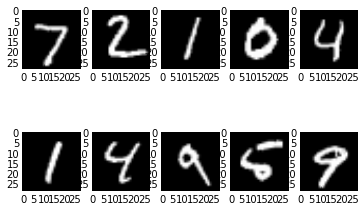

In [80]:
view_digit_images(10, test_set_x_im)

### Learning The Optimal Parameters
- Minimize Loss function (cost) using stochastic gradient method with mini-batches
    - In Pure SG, gradient is estimated from one example at a time  
- negative log likelihood taken as loss function
    - $-\sum_i log\left( P\left(y = y^{(i)} | x^{(i)}, W, b\right)\right)$
        - optimization parameters $\theta = {W, b}$

In [86]:
def sgd_optimization_mnist(learning_rate=0.13, n_epochs=1000,
                           dataset='mnist.pkl.gz',
                           batch_size=600):
    
    datasets = load_data(dataset)

    train_set_x, train_set_y = datasets[0]
    valid_set_x, valid_set_y = datasets[1]
    test_set_x, test_set_y = datasets[2]
    
    # compute number of minibatches for training, validation and testing
    n_train_batches = train_set_x.get_value(borrow=True).shape[0] // batch_size
    n_valid_batches = valid_set_x.get_value(borrow=True).shape[0] // batch_size
    n_test_batches = test_set_x.get_value(borrow=True).shape[0] // batch_size

    
    print('... building the model')
    print(train_set_y.get_value())

    index = T.lscalar()  
    x = T.matrix('x')  
    y = T.ivector('y')  

    classifier = LogisticRegression(input=x, inputDim=28 * 28, outputDim=10)

    cost = classifier.negative_log_likelihood(y)

    test_model = function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: test_set_x[index * batch_size: (index + 1) * batch_size],
            y: test_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )

    validate_model = function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: valid_set_x[index * batch_size: (index + 1) * batch_size],
            y: valid_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )

    g_W = T.grad(cost=cost, wrt=classifier.W)
    g_b = T.grad(cost=cost, wrt=classifier.b)

    updates = [(classifier.W, classifier.W - learning_rate * g_W),
               (classifier.b, classifier.b - learning_rate * g_b)]

    train_model = function(
        inputs=[index],
        outputs=cost,
        updates=updates,
        givens={
            x: train_set_x[index * batch_size: (index + 1) * batch_size],
            y: train_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )
    

    print('... training the model')
    # early-stopping parameters
    patience = 5000  
    patience_increase = 2  
                                 
    improvement_threshold = 0.995  
    validation_frequency = min(n_train_batches, patience / 2)
                                  

    best_validation_loss = np.inf
    test_score = 0.
    start_time = timeit.default_timer()

    done_looping = False
    epoch = 0
    while (epoch < n_epochs) and (not done_looping):
        epoch = epoch + 1
        for minibatch_index in range(n_train_batches):

            minibatch_avg_cost = train_model(minibatch_index)
            # iteration number
            iter = (epoch - 1) * n_train_batches + minibatch_index

            if (iter + 1) % validation_frequency == 0:
                # compute zero-one loss on validation set
                validation_losses = [validate_model(i)
                                     for i in range(n_valid_batches)]
                this_validation_loss = np.mean(validation_losses)

                """
                print(
                    'epoch %i, minibatch %i/%i, validation error %f %%' %
                    (
                        epoch,
                        minibatch_index + 1,
                        n_train_batches,
                        this_validation_loss * 100.
                    )
                )
                """
               
                if this_validation_loss < best_validation_loss:
                    if this_validation_loss < best_validation_loss *  \
                       improvement_threshold:
                        patience = max(patience, iter * patience_increase)

                    best_validation_loss = this_validation_loss
                    # test it on the test set

                    test_losses = [test_model(i)
                                   for i in range(n_test_batches)]
                    test_score = np.mean(test_losses)
                    
                    print(
                        (
                            '     epoch %i, minibatch %i/%i, test error of'
                            ' best model %f %%'
                        ) %
                        (
                            epoch,
                            minibatch_index + 1,
                            n_train_batches,
                            test_score * 100.
                        )
                    )
                    
                    # save the best model
                    with open('best_model.pkl', 'wb') as f:
                        pickle.dump(classifier, f)

            if patience <= iter:
                done_looping = True
                break

    end_time = timeit.default_timer()
    print(
        (
            'Optimization complete with best validation score of %f %%,'
            'with test performance %f %%'
        )
        % (best_validation_loss * 100., test_score * 100.)
    )
    print ('The code run for %d epochs, with %f epochs/sec' % (
        epoch, 1. * epoch / (end_time - start_time)))
    
    print('The code for file ' + 'mnist.pkl.gz' +
                          ' ran for %.1fs' % (end_time - start_time), file=sys.stderr )
    
    print(classifier.b.get_value())



In [91]:
def predict():
    """
    An example of how to load a trained model and use it
    to predict labels.
    """
    
    import matplotlib.pyplot as plt
    from PIL import Image
    %matplotlib inline

    # load the saved model
    #classifier = cPickle.load(open('best_model.pkl'))
    classifier = pickle.load(open('best_model.pkl', 'rb'))
    
    print('........predicting .......')
    print(classifier)

    # compile a predictor function
    predict_model = function(
        inputs=[classifier.input],
        outputs=classifier.y_pred)

    # We can test it on some examples from test test
    dataset='mnist.pkl.gz'
    datasets = load_data(dataset)
    test_set_x, test_set_y = datasets[2]
    test_set_x = test_set_x.get_value()

    predicted_values = predict_model(test_set_x[:10])
    
    f, ax = plt.subplots(2, 5)
    i = 0
    j = 0
    for digit in test_set_x[:10]:  
        ax[i][j].imshow(digit.reshape(28,28))
        j = j+1
        if(j==5):
            j = 0
            i = i+1
    plt.show()
    
    print ("Predicted values for the first 10 examples in test set:")
    print(predicted_values)

........predicting .......
....... LOADING DATA.....
(50000, 784)


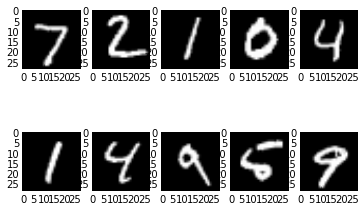

Predicted values for the first 10 examples in test set:
[7 2 1 0 4 1 4 9 6 9]


In [92]:
if __name__ == '__main__':
    #sgd_optimization_mnist()
    predict()